### Hierarchical Agglomerative method for Clustering

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

In [34]:
data = pd.read_excel('Data Files/hierarchical_clustering.xlsx')
data

,Variable 1,Variable 2
0,2.00,2.0
1,5.50,4.0
2,5.00,5.0
3,1.50,2.5
4,1.00,1.0
5,7.00,5.0
6,5.75,6.5


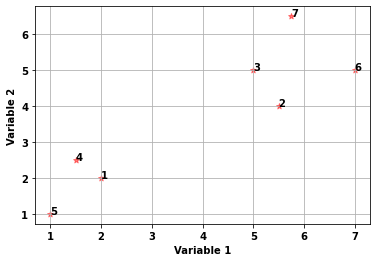

In [35]:
x = data['Variable 1']
y = data['Variable 2']
n = range(1, 8)

fig, ax = plt.subplots()
ax.scatter(x, y, marker='*', c='red', alpha=0.5)
plt.grid()
plt.xlabel('Variable 1')
plt.ylabel('Variable 2')

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i], y[i]))

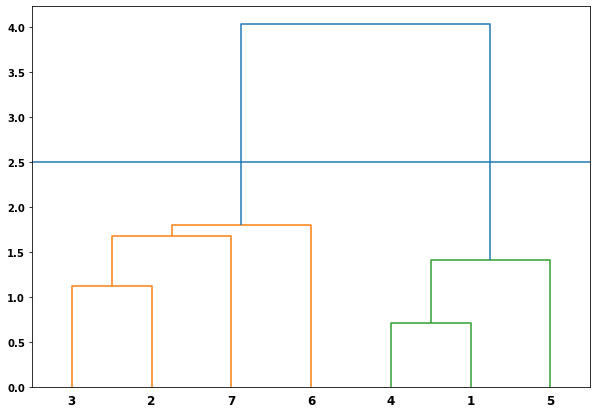

In [36]:
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(data, 'single')

labelList = range(1, 8)

plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', labels=labelList, distance_sort='descending', show_leaf_counts=True)

plt.axhline(y=2.5)
plt.show()

In [37]:
import sklearn
from sklearn.cluster import AgglomerativeClustering

k = 2
HClustering = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='single')
HClustering.fit(data)

AgglomerativeClustering(linkage='single')

In [38]:
HClustering.fit_predict(data)

array([1, 0, 0, 1, 1, 0, 0], dtype=int64)

In [39]:
print(HClustering.labels_)

[1 0 0 1 1 0 0]


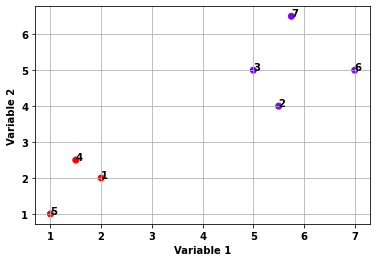

In [40]:
x = data['Variable 1']
y = data['Variable 2']
n = range(1, 8)

fig, ax = plt.subplots()
ax.scatter(x, y, c=HClustering.labels_, cmap='rainbow')
plt.grid()
plt.xlabel('Variable 1')
plt.ylabel('Variable 2')

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i], y[i]))

### Classification and Regression Trees (CART)

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [42]:
data = pd.read_excel('Data Files/CART.xlsx')

In [43]:
data

,RID,age,income,student,credit_rating,buys_computer
0,1,youth,high,no,fair,no
1,2,youth,high,no,excellent,no
2,3,middle_aged,high,no,fair,yes
3,4,senior,medium,no,fair,yes
4,5,senior,low,yes,fair,yes
5,6,senior,low,yes,excellent,no
6,7,middle_aged,low,yes,excellent,yes
7,8,youth,medium,no,fair,no
8,9,youth,low,yes,fair,yes
9,10,senior,medium,yes,fair,yes


In [44]:
import sklearn
from sklearn.preprocessing import LabelEncoder

In [45]:
le_age = LabelEncoder()
le_income = LabelEncoder()
le_student = LabelEncoder()
le_credit_rating = LabelEncoder()
le_buys_computer = LabelEncoder()

In [46]:
data['age_n'] = le_age.fit_transform(data['age'])
data['income_n'] = le_income.fit_transform(data['income'])
data['student_n'] = le_student.fit_transform(data['student'])
data['credit_rating_n'] = le_credit_rating.fit_transform(data['credit_rating'])
data['buys_computer_n'] = le_buys_computer.fit_transform(data['buys_computer'])

In [47]:
data.head()

,RID,age,income,student,credit_rating,buys_computer,age_n,income_n,student_n,credit_rating_n,buys_computer_n
0,1,youth,high,no,fair,no,2,0,0,1,0
1,2,youth,high,no,excellent,no,2,0,0,0,0
2,3,middle_aged,high,no,fair,yes,0,0,0,1,1
3,4,senior,medium,no,fair,yes,1,2,0,1,1
4,5,senior,low,yes,fair,yes,1,1,1,1,1


In [48]:
data_new = data.drop(['age', 'income', 'student', 'credit_rating', 'buys_computer'], axis='columns')
data_new.head()

,RID,age_n,income_n,student_n,credit_rating_n,buys_computer_n
0,1,2,0,0,1,0
1,2,2,0,0,0,0
2,3,0,0,0,1,1
3,4,1,2,0,1,1
4,5,1,1,1,1,1


In [49]:
feature_cols = ['age_n', 'income_n', 'student_n', 'credit_rating_n']
x = data_new.drop(['buys_computer_n', 'RID'], axis='columns')   #input
y = data_new['buys_computer_n']    #target

In [50]:
x.head()

,age_n,income_n,student_n,credit_rating_n
0,2,0,0,1
1,2,0,0,0
2,0,0,0,1
3,1,2,0,1
4,1,1,1,1


In [51]:
y.head()

0    0
1    0
2    1
3    1
4    1
Name: buys_computer_n, dtype: int32

In [52]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
dt = clf.fit(x, y)
dt

DecisionTreeClassifier()

In [53]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

In [54]:
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=feature_cols, class_names=['0', '1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('buys_computer.png')

True

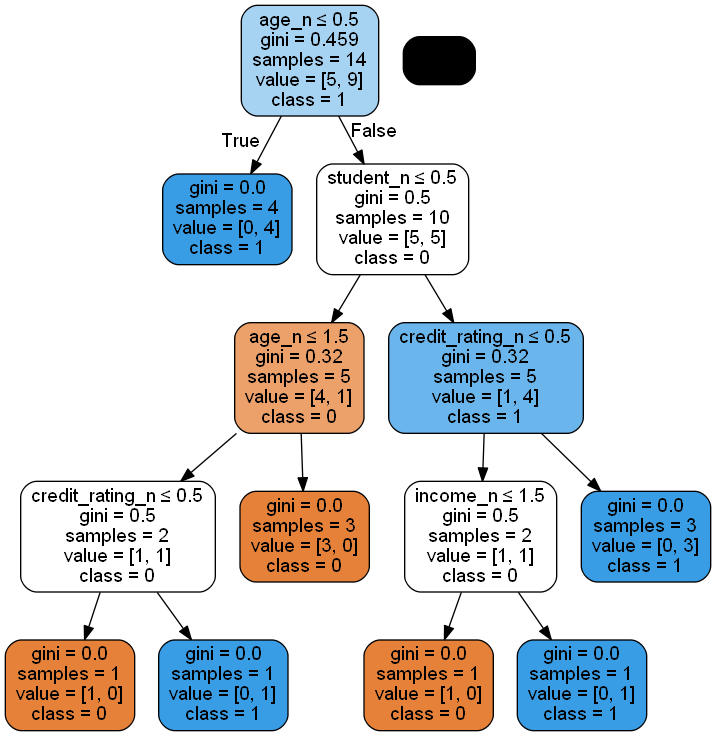

In [55]:
Image(graph.create_png())

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [58]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
dt = clf.fit(x_train, y_train)
dt

DecisionTreeClassifier()

In [59]:
from sklearn import metrics

In [60]:
y_pred = clf.predict(x_test)

In [61]:
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.75


In [62]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

In [63]:
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=feature_cols, class_names=['0', '1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('buys_computer.png')

True

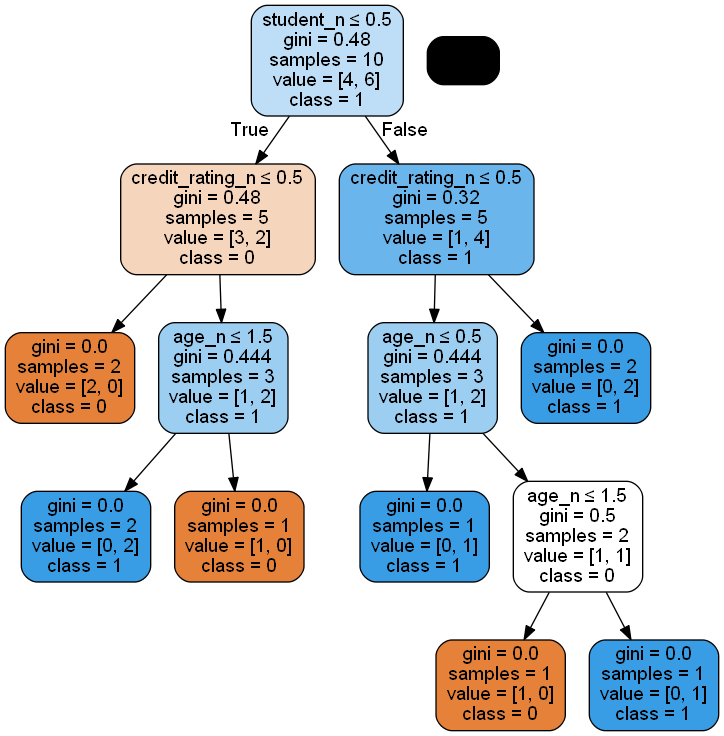

In [64]:
Image(graph.create_png())